In [ ]:
!ls

cnn_model.hdf5	     nsl_kdd_train.csv	__pycache__
lstm_cnn_model.hdf5  preprocessing.py	sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from time import time
from preprocessing import preproc
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation, MaxPooling2D, SimpleRNN, Flatten, Reshape, Dropout, Embedding, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import seaborn as sn

Using TensorFlow backend.


In [ ]:
from google.colab import files
# files.download("lstm_cnn_model.hdf5")
# files.download("cnn_model.hdf5")
files.upload()
!ls

Saving nsl_kdd_train.csv to nsl_kdd_train.csv
Saving preprocessing.py to preprocessing.py
nsl_kdd_train.csv  preprocessing.py  sample_data


In [ ]:
def lstm_cnn_model():
  lstm_output_size = 70
  cnn = Sequential()
  cnn.add(Convolution1D(64, 3, border_mode="same",activation="relu",input_shape=(41, 1)))
  cnn.add(Convolution1D(64, 3, border_mode="same", activation="relu"))
  cnn.add(MaxPooling1D(pool_length=(2)))
  cnn.add(Convolution1D(128, 3, border_mode="same", activation="relu"))
  cnn.add(Convolution1D(128, 3, border_mode="same", activation="relu"))
  cnn.add(MaxPooling1D(pool_length=(2)))
  cnn.add(LSTM(lstm_output_size))
  cnn.add(Dropout(0.1))
  cnn.add(Dense(23, activation="softmax"))
  cnn.summary()
  return cnn

def cnn_model():
  cnn = Sequential()
  cnn.add(Convolution1D(64, 3, border_mode="same",activation="relu",input_shape=(41, 1)))
  cnn.add(Convolution1D(64, 3, border_mode="same", activation="relu"))
  cnn.add(MaxPooling1D(pool_length=(2)))
  cnn.add(Convolution1D(128, 3, border_mode="same", activation="relu"))
  cnn.add(Convolution1D(128, 3, border_mode="same", activation="relu"))
  cnn.add(MaxPooling1D(pool_length=(2)))
  cnn.add(Flatten())
  cnn.add(Dense(128, activation="relu"))
  cnn.add(Dropout(0.5))
  cnn.add(Dense(23, activation="softmax"))
  cnn.summary()
  return cnn

def rnn_model():
  batch_size = 64
  model = Sequential()
  model.add(SimpleRNN(64,input_shape=(None, 41), return_sequences=True))  # try using a GRU instead, for fun
  model.add(Dropout(0.1))
  model.add(SimpleRNN(64,return_sequences=True))  # try using a GRU instead, for fun
  model.add(Dropout(0.1))
  model.add(SimpleRNN(64, return_sequences=True))  # try using a GRU instead, for fun
  model.add(Dropout(0.1))
  model.add(SimpleRNN(64, return_sequences=False))  # try using a GRU instead, for fun
  model.add(Dropout(0.1))
  model.add(Dense(23))
  model.add(Activation('softmax'))
  model.summary()
  return model

In [ ]:
X, y = preproc('nsl_kdd_train.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
X.shape

(125973, 41)

In [ ]:
y = np.transpose(y)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
y_train.shape

(80622, 23)

# **RESULTS**

In [ ]:
def load_model(model_type, strng):
  if int(model_type) == 1 :
    model = lstm_cnn_model()
  elif int(model_type) == 2:
    model = cnn_model()
  elif int(model_type == 3):
    model = rnn_model()
  model.load_weights(str(strng))
  model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
  return model

def loss_accuracy_confusion_matrix(cnn, X_test, y_test):
  loss, accuracy = cnn.evaluate(X_test, y_test)
  print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
  y_pred = cnn.predict_classes(X_test)
  y_test_non_category = [ np.argmax(t) for t in y_test ]
  target_names = output_names = cm_names = ["back.", "buffer_overflow.", "ftp_write.", "guess_passwd.", "imap.", "ipsweep.", "land.", "loadmodule.", "multihop.", "neptune.", "nmap.", "normal.", "perl.", "phf.", "pod.", "portsweep.", "rootkit.", "satan.", "smurf.", "spy.", "teardrop.", "warezclient."]
  cm = confusion_matrix(y_test_non_category, y_pred)
  print(cm.shape)
  print(cm)
  print(classification_report(y_test_non_category,y_pred, target_names=target_names))  
  print(accuracy_score(y_test_non_category, y_pred))
  df_cm = pd.DataFrame(cm, index=cm_names, columns=cm_names)
  plt.figure(figsize=(14,10))
  sn.heatmap(df_cm, cmap="Blues",annot=True)
  
def loss_accuracy_confusion_matrix_new(cnn, X_test, y_test):
  loss, accuracy = cnn.evaluate(X_test, y_test)
  print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
  y_pred = cnn.predict_classes(X_test)
  y_pred = five_class(y_pred)
  y_test_non_category = [ np.argmax(t) for t in y_test ]
  y_test_non_category = five_class(y_test_non_category)
  target_names = output_names = cm_names = ["DOS.", "Probe.", "R2L.", "U2R.", "Normal."]
  cm = confusion_matrix(y_test_non_category, y_pred)
  print(cm.shape)
  print(cm)
  print(classification_report(y_test_non_category,y_pred, target_names=target_names))  
  print(accuracy_score(y_test_non_category, y_pred))
  df_cm = pd.DataFrame(cm, index=cm_names, columns=cm_names)
  plt.figure(figsize=(5,5))
  sn.heatmap(df_cm, cmap="Blues",annot=True)

In [ ]:
X, y = preproc('nsl_kdd_train.csv')
y = np.transpose(y) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

##**LSTM CNN MODEL**

![alt text](https://www.researchgate.net/profile/Vinayakumar_R/publication/325253219/figure/fig1/AS:628047229247489@1526749536847/figure-fig1.png)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", input_shape=(41, 1), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 41, 64)            256       
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 41, 64)            12352     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 20, 64)            0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 20, 128)           24704     
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 20, 128)           49280     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 70)                55720     
__________

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


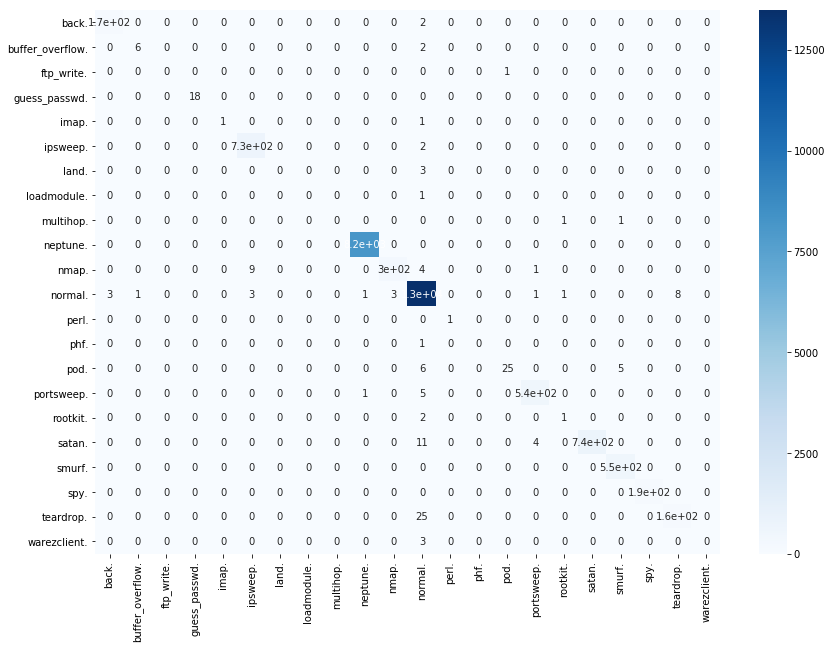

In [ ]:
lstm_cnn = load_model(1, "lstm_cnn_model.hdf5")
loss_accuracy_confusion_matrix(lstm_cnn, X_test, y_test)

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
y_pred = cnn.predict_classes(X_test)
y_test_non_category = [ np.argmax(t) for t in y_test ]
print(y_pred)
print(y_test_non_category)
target_names = output_names = cm_names = ["back.", "buffer_overflow.", "ftp_write.", "guess_passwd.", "imap.", "ipsweep.", "land.", "loadmodule.", "multihop.", "neptune.", "nmap.", "normal.", "perl.", "phf.", "pod.", "portsweep.", "rootkit.", "satan.", "smurf.", "spy.", "teardrop.", "warezclient."]
print(target_names)



In [ ]:
def five_class(y):
  l = []
  for yi in y:
    if ( yi == 0 or yi == 6 or yi == 9 or yi == 14 or yi == 18 or yi == 20 ) :
      l.append(0)
    elif ( yi == 5 or yi == 10 or yi == 15 or yi == 17 ):
      l.append(1)
    elif ( yi == 2 or yi == 3 or yi == 4 or yi == 8 or yi == 13 or yi == 19 or yi == 21 or yi == 22 ):
      l.append(2) 
    elif ( yi == 1 or yi == 7 or yi == 12 or yi == 16 ):
      l.append(3)
    else :
      l.append(4)
  return l
!ls

cnn_model.hdf5	     nsl_kdd_train.csv	__pycache__
lstm_cnn_model.hdf5  preprocessing.py	sample_data


##**CNN MODEL**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", input_shape=(41, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `MaxPooling1D` call to the Ke

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 41, 64)            256       
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 41, 64)            12352     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 20, 64)            0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 20, 128)           24704     
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 20, 128)           49280     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
__________

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


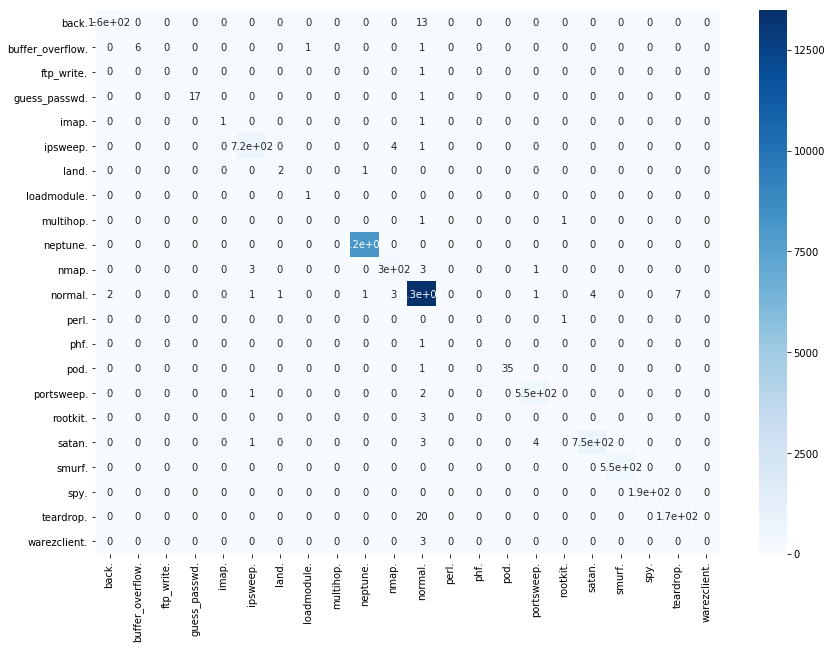

In [ ]:
cnn = load_model(2, "cnn_model.hdf5")
loss_accuracy_confusion_matrix(cnn, X_test, y_test)

##**SIMPLE RNN MODEL**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, None, 64)          6784      
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
__________

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


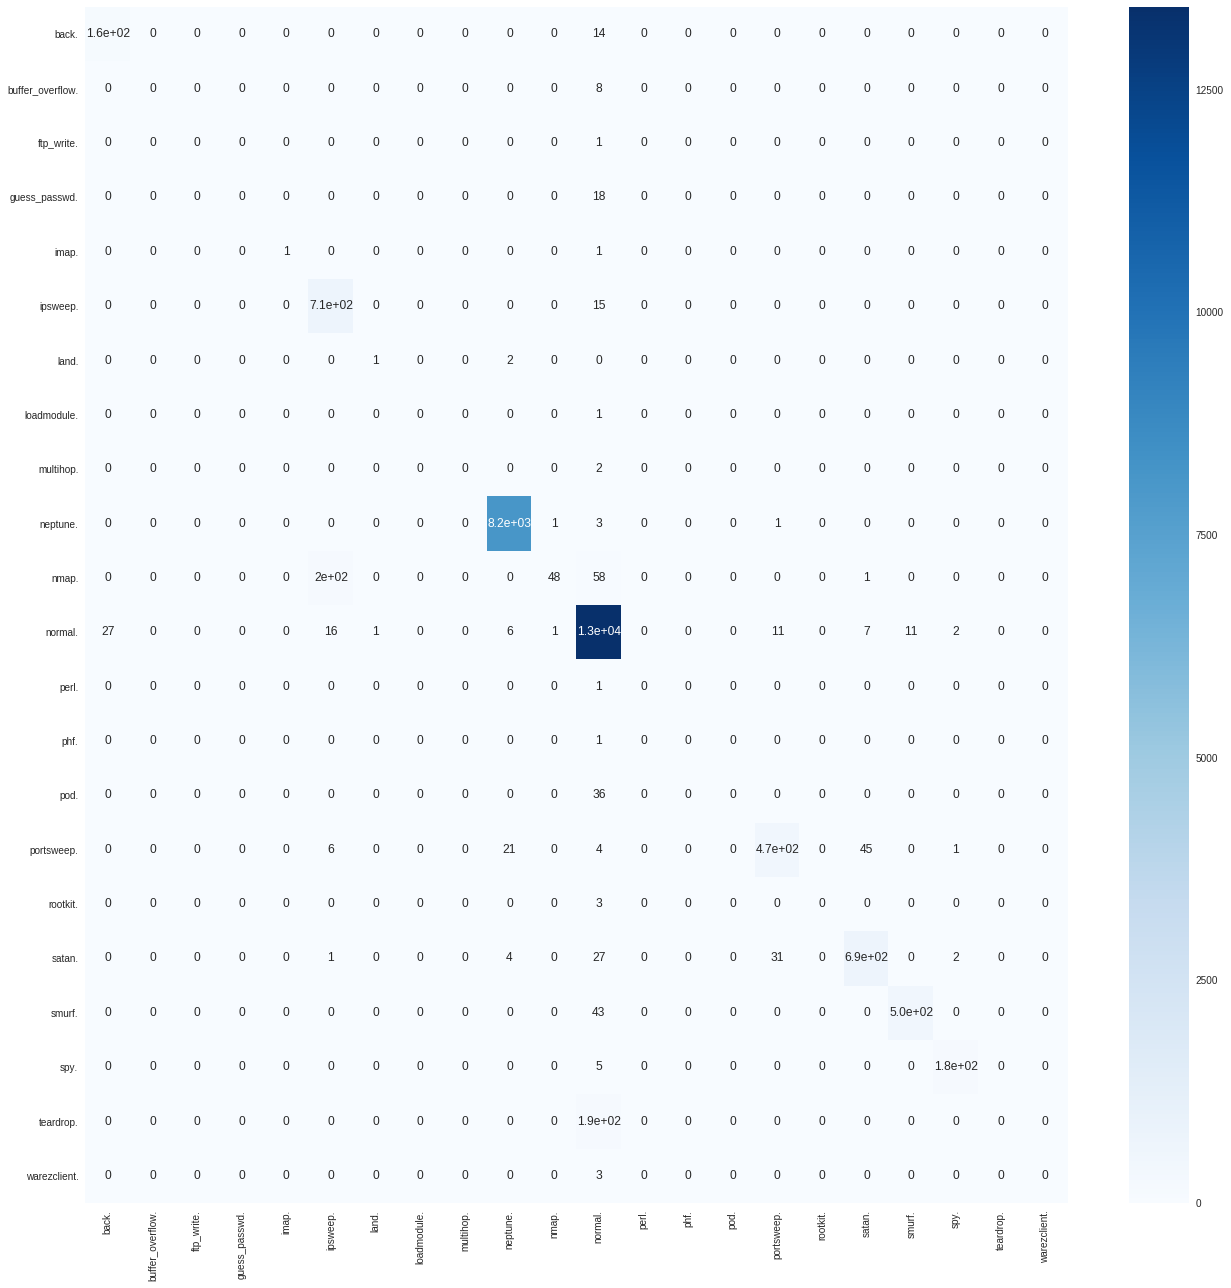

In [ ]:
lstm_cnn = load_model(3, "rnn_model.hdf5")
loss_accuracy_confusion_matrix(lstm_cnn, X_test, y_test)